# **Installations & Packages**

In [2]:
! pip install numpy
! pip install pandas

# **DataFrame Exploration**

In [45]:
from statsmodels.stats.weightstats import ttest_ind, ztest
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv("/content/fifa_dataset.csv")
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,2.0,CM,2017,2019-01-01,5.750000,134.0,143.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,2.0,ST,2018,2020-01-01,6.250000,170.0,113.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,2.0,ST,2017,2021-01-01,5.666667,148.0,165.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,RW,2018,2019-01-01,5.833333,154.0,143.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

In [47]:
df.describe()

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause
count,18207.000000,18207.000000,18207.000000,18207.000000,17955.000000,18207.000000,18159.000000,18159.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,214298.338606,25.122206,66.238699,71.307299,2444.530214,9.731312,1.113222,2.361308,2016.420607,5.946771,165.979129,4585.060971
std,29965.244204,4.669943,6.908930,6.136496,5626.715434,21.999290,0.394031,0.756164,2.018194,0.220514,15.572775,10630.414430
min,16.000000,16.000000,46.000000,48.000000,10.000000,0.000000,1.000000,1.000000,1991.000000,5.083333,110.000000,13.000000
25%,200315.500000,21.000000,62.000000,67.000000,325.000000,1.000000,1.000000,2.000000,2016.000000,5.750000,154.000000,570.000000
50%,221759.000000,25.000000,66.000000,71.000000,700.000000,3.000000,1.000000,2.000000,2017.000000,5.916667,165.000000,1300.000000
75%,236529.500000,28.000000,71.000000,75.000000,2100.000000,9.000000,1.000000,3.000000,2018.000000,6.083333,176.000000,4585.060806
max,246620.000000,45.000000,94.000000,95.000000,118500.000000,565.000000,5.000000,5.000000,2018.000000,6.750000,243.000000,228100.000000


# **Preprocessing: Filling the Null Values**

In [48]:
avg_value = df['Value'].mean()
avg_rep = df['International Reputation'].mean()
avg_skills = (df['Skill Moves'].mean())
contract_mode = df['Contract Valid Until'].mode()[0]
club_mode = df['Club'].value_counts().idxmax()

print(f"Average Value is: {avg_value:.2f}")
print(f"Average International Reputation is: {avg_rep:.2f}")
print(f"Average Skill Moves is: {avg_skills:.2f}")
print(f"Most Common Contract Expiration Year is: {contract_mode}")
print(f"Most Common Club is: {club_mode}")

Average Value is: 2444.53
Average International Reputation is: 1.11
Average Skill Moves is: 2.36
Most Common Contract Expiration Year is: 2019-01-01
Most Common Club is: FC Barcelona


In [49]:
df['Value'].fillna(df['Value'].mean(), inplace=True)
df['International Reputation'].fillna(df['International Reputation'].mean(), inplace=True)
df['Skill Moves'].fillna(df['Skill Moves'].mean(), inplace=True)
df['Contract Valid Until'].fillna(contract_mode, inplace=True)
df['Club'].fillna(club_mode, inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      18207 non-null  object 
 7   Value                     18207 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18207 non-null  float64
 11  Skill Moves               18207 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

# **BoxPlots & Statistics**

In [56]:
# Check for missing values and convert 'Wage' column to numeric
df['Wage'] = pd.to_numeric(df['Wage'], errors='coerce')

# Calculate quartiles, IQR, mean, standard deviation, and variance
q1 = df['Wage'].quantile(0.25)
q2 = df['Wage'].median()
q3 = df['Wage'].quantile(0.75)
iqr = q3 - q1
mean = df['Wage'].mean()
std_dev = df['Wage'].std()
variance = df['Wage'].var()

# Display statistics
print("Statistics of the 'Wage' Column:\n")
print(f"- Q1: {q1:.2f}")
print(f"- Q2 (Median): {q2:.2f}")
print(f"- Q3: {q3:.2f}")
print(f"- IQR: {iqr:.2f}")
print(f"- Mean: {mean:.2f}")
print(f"- Standard Deviation: {std_dev:.2f}")
print(f"- Variance: {variance:.2f}")

Statistics of the 'Wage' Column:

- Q1: 1.00
- Q2 (Median): 3.00
- Q3: 9.00
- IQR: 8.00
- Mean: 9.73
- Standard Deviation: 22.00
- Variance: 483.97


<ipython-input-82-cbd084fdac7b>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Value'], color='blue', shade=True)


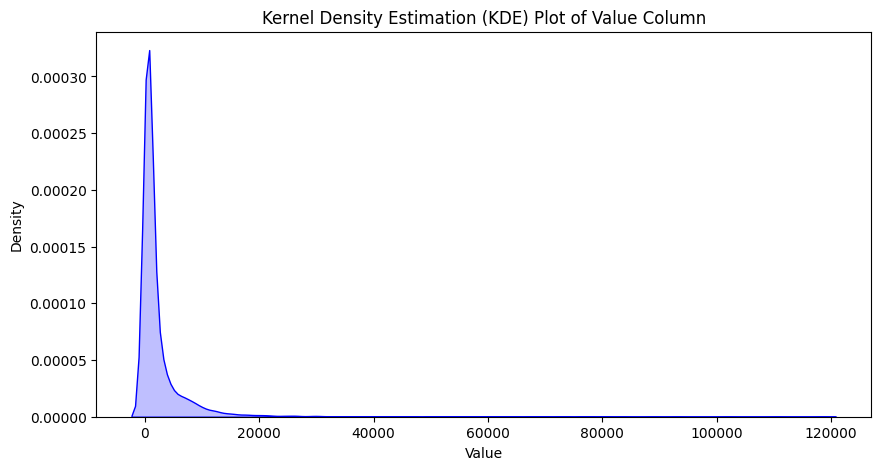

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a KDE plot of the 'Value' column
plt.figure(figsize=(10, 5))
sns.kdeplot(df['Value'], color='blue', shade=True)

plt.title('Kernel Density Estimation (KDE) Plot of Value Column')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


<ipython-input-83-95581c93cec2>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(transformed_data, color='blue', shade=True)


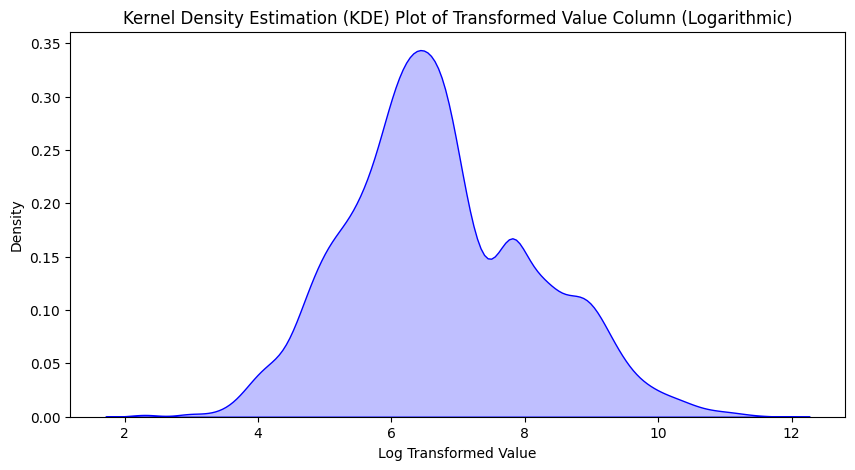

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Apply logarithmic transformation
transformed_data = np.log(df['Value'])

# Create a KDE plot of the transformed data
plt.figure(figsize=(10, 5))
sns.kdeplot(transformed_data, color='blue', shade=True)

plt.title('Kernel Density Estimation (KDE) Plot of Transformed Value Column (Logarithmic)')
plt.xlabel('Log Transformed Value')
plt.ylabel('Density')
plt.show()

# **Checking the New DF Characteristics**

#### **DF Top Rows**

In [85]:
pd_top = df.head(5)
pd_top

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


#### **DF Age Series Average**

In [56]:
avg_age = df['Age'].mean().round(2)
avg_age

25.12

#### **DF Maximum Height & Player Name**

In [60]:
max_height = df['Height'].max()
player_with_max_height = df[df['Height'] == max_height]['Name'].values[0]

print(f"The player with the greatest height is: {player_with_max_height}, with a hight of: {max_height}")

The player with the greatest height is: T. Holý, with a hight of: 6.75


#### **DF Smallest Weight & Players Names & Clubs Names**

In [72]:
min_weight = df['Weight'].min()
player_with_min_weight = df[df['Weight'] == min_weight]
player_names = player_with_min_weight['Name'].values
player_clubs = player_with_min_weight['Club'].values

player_info = ""
for i in range(len(player_names)):
    player_info += f"'{player_names[i]}' playing for '{player_clubs[i]}'"
    if i < len(player_names) - 1:
        player_info += " and "

print(f"The player(s) with the smallest weight of '{int(min_weight)}' are {player_info}.")

The player(s) with the smallest weight of '110' are 'B. Al Mutairi' playing for 'Al Batin' and 'K. Yamaguchi' playing for 'Shonan Bellmare'.


#### **Cristiano Ronaldo Position Retrieval**

In [76]:
cristiano_position = df[df['Name'] == 'Cristiano Ronaldo']['Position'].values[0]
print(f"Cristiano Ronaldo's position is: {str(cristiano_position)}")

Cristiano Ronaldo's position is: ST


#### **Average Value of all players per year**

In [87]:
df['Joined'] = df['Joined'].astype(str)
average_value_per_year = df.groupby(df['Joined'].str[:])['Value'].mean().astype(int)
average_value = pd.DataFrame({'Year': average_value_per_year.index, 'Avg Value': average_value_per_year.values})

average_value.head(5)

,Year,Avg Value
0,1991,160
1,1998,106
2,1999,40
3,2000,110
4,2001,237


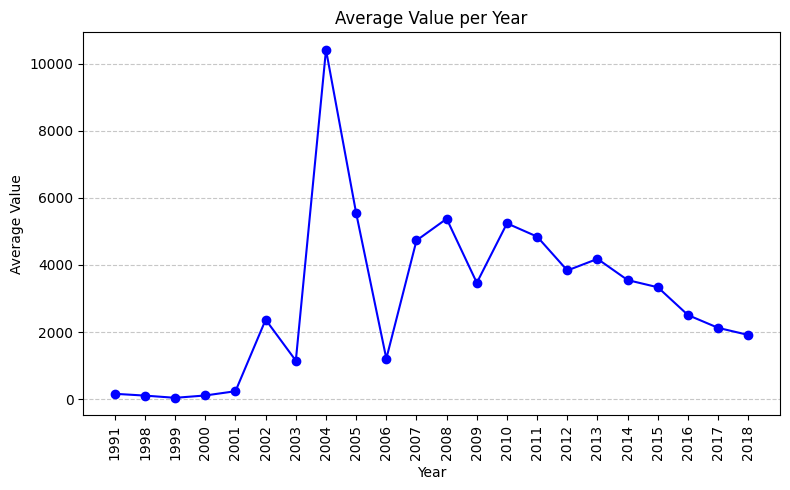

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a line plot
plt.figure(figsize=(8, 5))
plt.plot(average_value['Year'], average_value['Avg Value'], marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Average Value per Year')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


#### **Number of players for Each club**

In [91]:
club_counts = df['Club'].value_counts().head(5)
club_counts

FC Barcelona          274
Valencia CF            33
Fortuna Düsseldorf     33
Cardiff City           33
Rayo Vallecano         33
Name: Club, dtype: int64

#### **DF Unique Clubs**

In [101]:
unique_clubs_count = len(df['Club'].unique())
unique_clubs_countn = df['Club'].nunique()

print(f"Unique clubs using the len method with unique function are: {unique_clubs_count}")
print(f"Unique clubs using the nunique function are: {unique_clubs_countn}")

Unique clubs using the len method with unique function are: 651
Unique clubs using the nunique function are: 651


#### **Top 5 Common Positions**

In [111]:
top_positions = df['Position'].value_counts().head(5).reset_index()
top_positions.columns = ['Position', 'Count']

print(top_positions)

  Position  Count
0       ST   2154
1       GK   2027
2       CB   1779
3       CM   1395
4       LB   1372


#### **Top 5 Common Nationalities**

In [117]:
top_nationalities = df['Nationality'].value_counts().head(5).reset_index()
top_nationalities.columns = ['Nationalities', 'Count']
print(f"Top 5 most common nationalities are:\n{top_nationalities}")

Top 5 most common nationalities are:
  Nationalities  Count
0       England   1662
1       Germany   1198
2         Spain   1072
3     Argentina    937
4        France    914


#### **Players with Egyptian Nationalities**

In [122]:
egyptian_players = df[df['Nationality'] == 'Egypt']['Name'].head(5).reset_index()
print(f"Names of players with Egyptian nationality are:\n{egyptian_players}")

Names of players with Egyptian nationality are:
   index       Name
0     26   M. Salah
1    752  Trezeguet
2    959  M. Elneny
3   1517  A. Hegazi
4   2241  A. Hassan


In [128]:
egyptian_players = df[df['Nationality'] == 'Egypt']['Name'].head(5)

print("Players with Egyptian nationality are:")
for i, player_name in enumerate(egyptian_players, 1):
    print(f"{i}. {player_name}")

Players with Egyptian nationality are:
1. M. Salah
2. Trezeguet
3. M. Elneny
4. A. Hegazi
5. A. Hassan


#### **Players joined in 2018 with skill moves = 2**

In [93]:
df['Joined'] = df['Joined'].astype(str)
p_2018_s_2 = df[(df['Joined'].str[:] == '2018') & (df['Skill Moves'] == 2)]
p_2018_s_2 = len(p_2018_s_2)

print(f"Number of players who joined in 2018 with 2 in skill moves = {p_2018_s_2}")

Number of players who joined in 2018 with 2 in skill moves = 3295


#### **Players whom name starts with letter = M or m**

In [98]:
players_with_m = df[df['Name'].str.lower().str.startswith('m', na=False)]
num_players_with_m = len(players_with_m)

print(f"Number of players whose names start with 'M' or 'm' = {num_players_with_m} Players")

Number of players whose names start with 'M' or 'm' = 1975 Players


# **Advanced DF Mathimatics**

#### **Correlation Between Reputation & Wage**

In [132]:
correlation = df['International Reputation'].corr(df['Wage'])

print(f"Correlation between International Reputation and Wage: {correlation:.2f}")

Correlation between International Reputation and Wage: 0.67


#### **Performing a Z_Test & T_Test Regarding Reputation & Wage**

In [100]:
from scipy import stats
from statsmodels.stats.weightstats import ztest

group1 = df[df['International Reputation'] > df['International Reputation'].mean()]['Wage']
group2 = df[df['International Reputation'] <= df['International Reputation'].mean()]['Wage']

# Performing the t-test with unequal variances (Welch's t-test)
t_statistic, t_p_value = stats.ttest_ind(group1, group2, equal_var=False)

# Performing the z-test
z_statistic, z_p_value = ztest(group1, group2)

# Define the significance level (alpha)
alpha = 0.05

# Define hypotheses
null_hypothesis = "There is no significant difference in the wages of players based on their international reputation."
alternative_hypothesis = "There is a significant difference in the wages of players based on their international reputation."

# Print the test results and whether to accept or reject the null hypothesis
print(f"Null Hypothesis: {null_hypothesis}")
print(f"Alternative Hypothesis: {alternative_hypothesis}")
print(f"Significance Level (alpha α): {alpha}")

# Print the test statistics and p-values
print(f"\nT-Test Statistics: {t_statistic:.2f} and p-value: {t_p_value:.2f}")
print(f"Z-Test Statistics: {z_statistic:.2f} and p-value: {z_p_value:.2f}")

# Determine whether to accept or reject the null hypothesis
if t_p_value < alpha or z_p_value < alpha:
    print("\nReject the Null Hypothesis.")
    print("There is a significant difference in the wages of players based on their international reputation.")
else:
    print("\nAccept the Null Hypothesis.")
    print("There is no significant difference in the wages of players based on their international reputation.")

Null Hypothesis: There is no significant difference in the wages of players based on their international reputation.
Alternative Hypothesis: There is a significant difference in the wages of players based on their international reputation.
Significance Level (alpha α): 0.05

T-Test Statistics: 29.85 and p-value: 0.00
Z-Test Statistics: 84.35 and p-value: 0.00

Reject the Null Hypothesis.
There is a significant difference in the wages of players based on their international reputation.
